In [40]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('gold_data.csv')
df.head()

,Date,Price,Open,High,Low,Volume
0,29/09/2015,1127.1,1132.4,1133.6,1123.9,0.25
1,30/09/2015,1115.5,1127.5,1127.5,1111.3,0.28
2,01/10/2015,1114.0,1114.9,1118.3,1111.0,0.26
3,02/10/2015,1136.7,1113.0,1140.7,1105.0,0.47
4,05/10/2015,1137.7,1138.7,1141.3,1129.8,0.20


In [19]:
df.tail()

,Date,Price,Open,High,Low,Volume
1799,18/07/2022,1710.2,1706.4,1722.0,1704.4,0.0
1800,19/07/2022,1710.7,1707.2,1716.5,1702.6,0.0
1801,20/07/2022,1700.2,1709.5,1712.7,1690.1,0.0
1802,21/07/2022,1713.4,1693.7,1719.5,1678.4,0.0
1803,22/07/2022,1727.4,1717.2,1738.3,1711.7,0.0


In [20]:
df.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
dtype: int64

## Cleaning the Data

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [22]:
df.set_index('Date', inplace=True)

In [23]:
df.head()

,Price,Open,High,Low,Volume
Date,,,,,
2015-09-29,1127.1,1132.4,1133.6,1123.9,0.25
2015-09-30,1115.5,1127.5,1127.5,1111.3,0.28
2015-10-01,1114.0,1114.9,1118.3,1111.0,0.26
2015-10-02,1136.7,1113.0,1140.7,1105.0,0.47
2015-10-05,1137.7,1138.7,1141.3,1129.8,0.20


In [24]:
df = df.drop_duplicates()

In [25]:
df[['Price', 'Open', 'High', 'Low', 'Volume']] = df[['Price', 'Open', 'High', 'Low', 'Volume']].astype(float)

In [26]:
df = df[(zscore(df) < 3).all(axis=1)]

## Analyzing the Data

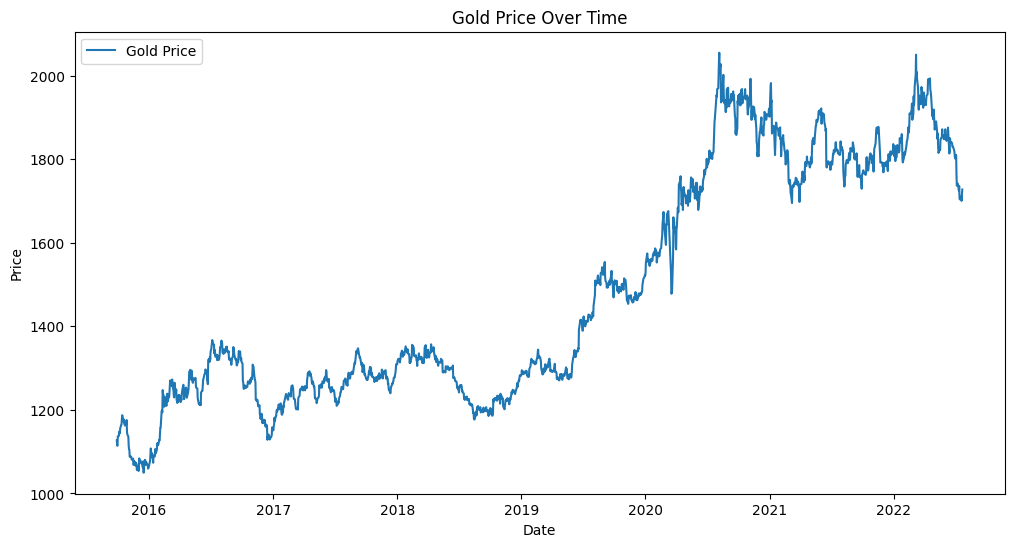

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Gold Price')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
descriptive_stats = df.describe()
print(descriptive_stats)

             Price         Open         High          Low       Volume
count  1789.000000  1789.000000  1789.000000  1789.000000  1789.000000
mean   1480.787909  1478.412197  1487.368569  1469.378340    88.838413
std     277.107404   274.264546   276.417850   271.512129   128.954597
min    1049.700000  1051.100000  1062.700000  1045.700000     0.000000
25%    1256.400000  1257.200000  1263.800000  1251.100000     0.570000
50%    1333.100000  1333.400000  1340.200000  1326.150000     1.840000
75%    1788.900000  1784.200000  1792.300000  1776.000000   203.650000
max    2054.600000  2062.400000  2085.200000  2033.600000   504.160000


In [29]:
correlation_matrix = df.corr()
print(correlation_matrix)

           Price      Open      High       Low    Volume
Price   1.000000  0.998635  0.999178  0.999122 -0.157468
Open    0.998635  1.000000  0.999398  0.999347 -0.158451
High    0.999178  0.999398  1.000000  0.999006 -0.154602
Low     0.999122  0.999347  0.999006  1.000000 -0.164018
Volume -0.157468 -0.158451 -0.154602 -0.164018  1.000000


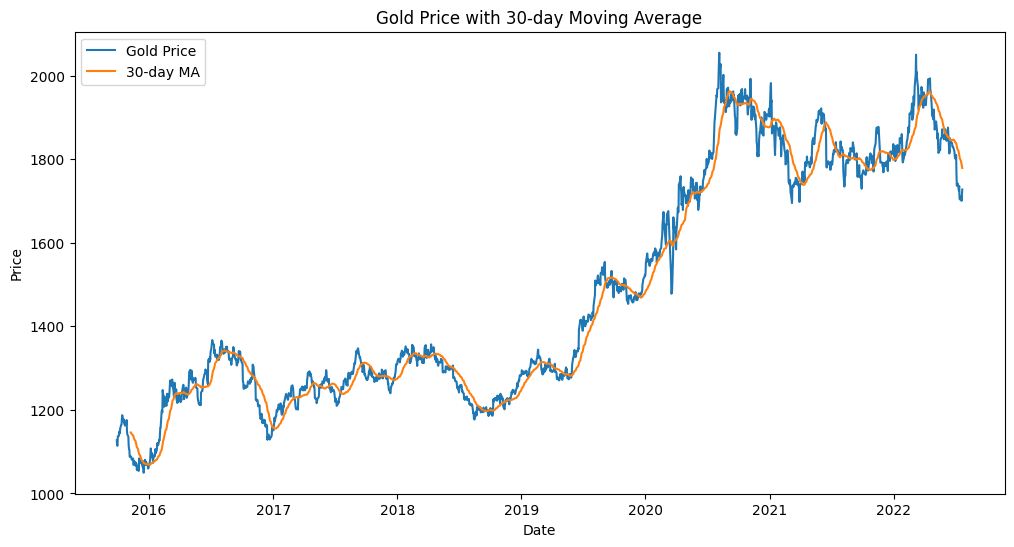

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Gold Price')
plt.plot(df['Price'].rolling(window=30).mean(), label='30-day MA')
plt.title('Gold Price with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


<AxesSubplot:>

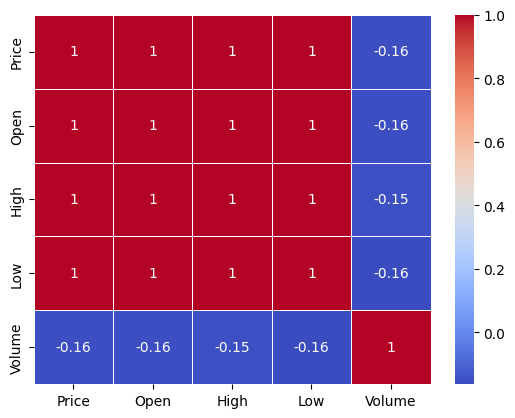

In [32]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

Text(0, 0.5, 'Frequency')

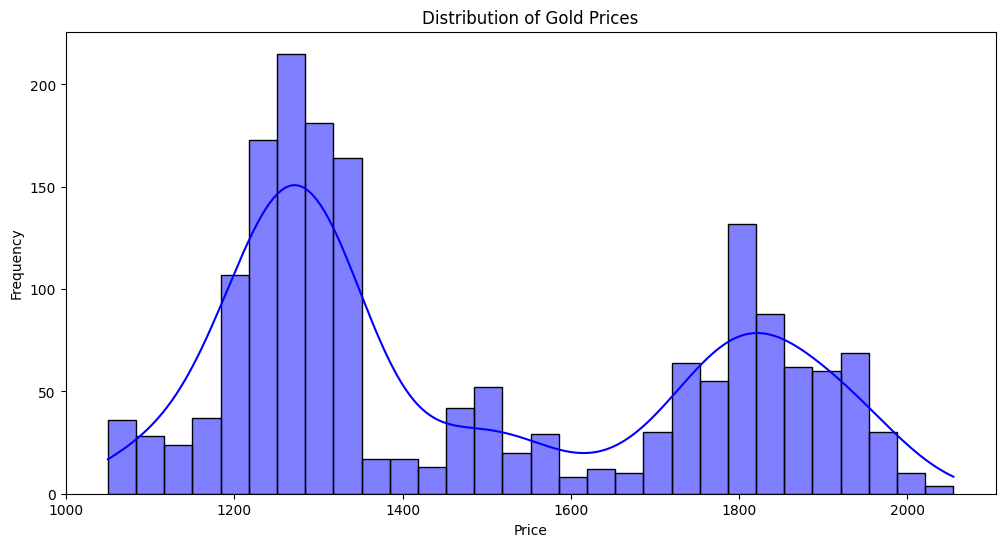

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Gold Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Volume')

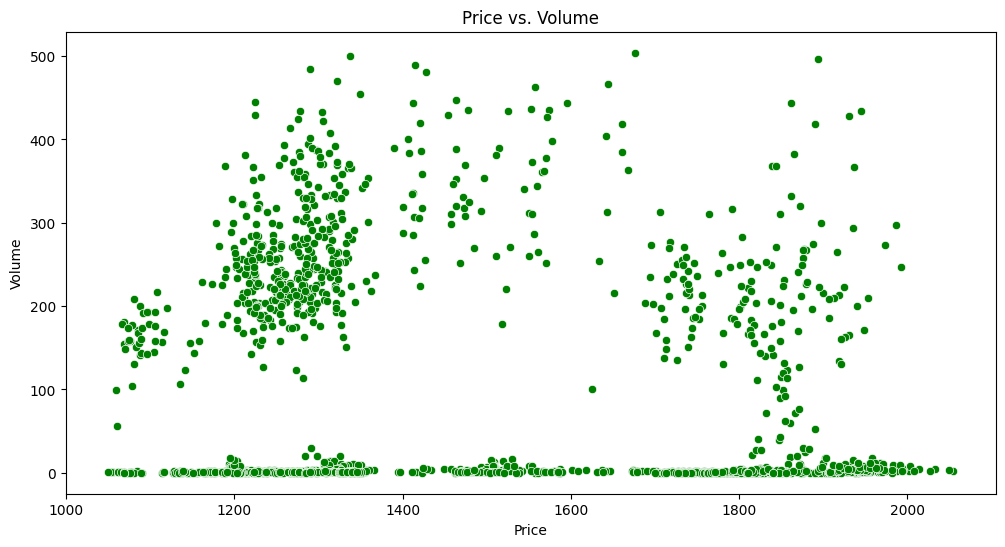

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price', y='Volume', data=df, color='green')
plt.title('Price vs. Volume')
plt.xlabel('Price')
plt.ylabel('Volume')

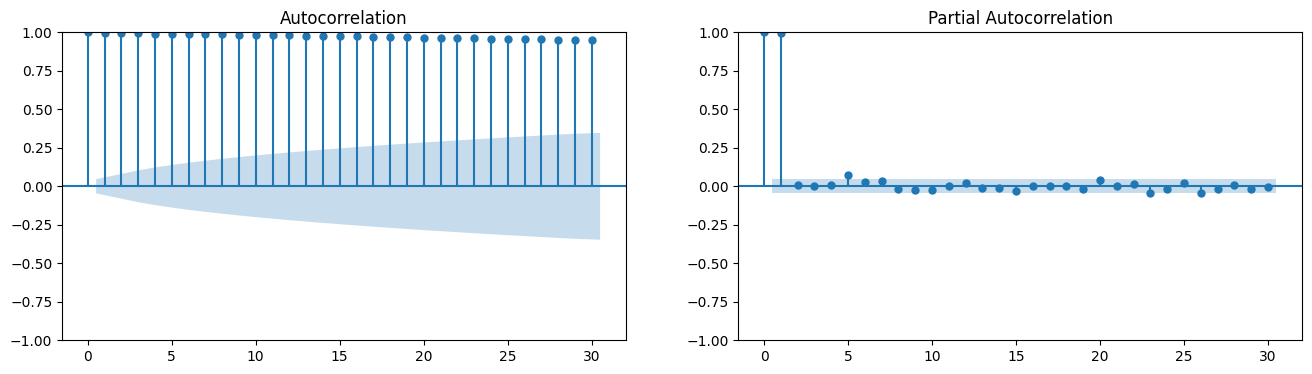

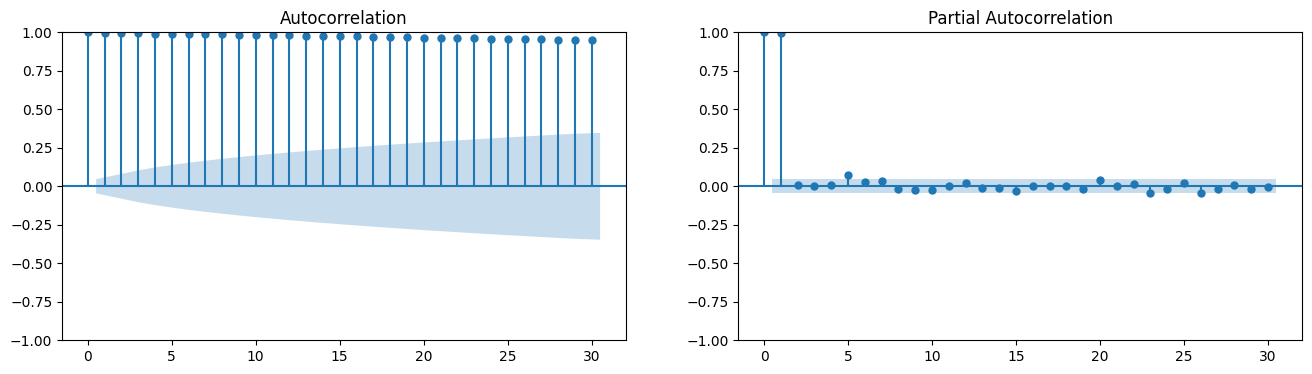

In [36]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(df['Price'], lags=30, ax=ax1)
plot_pacf(df['Price'], lags=30, ax=ax2)

In [38]:
result = adfuller(df['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.116335699524037
p-value: 0.7085136474729841


Text(0, 0.5, 'Price')

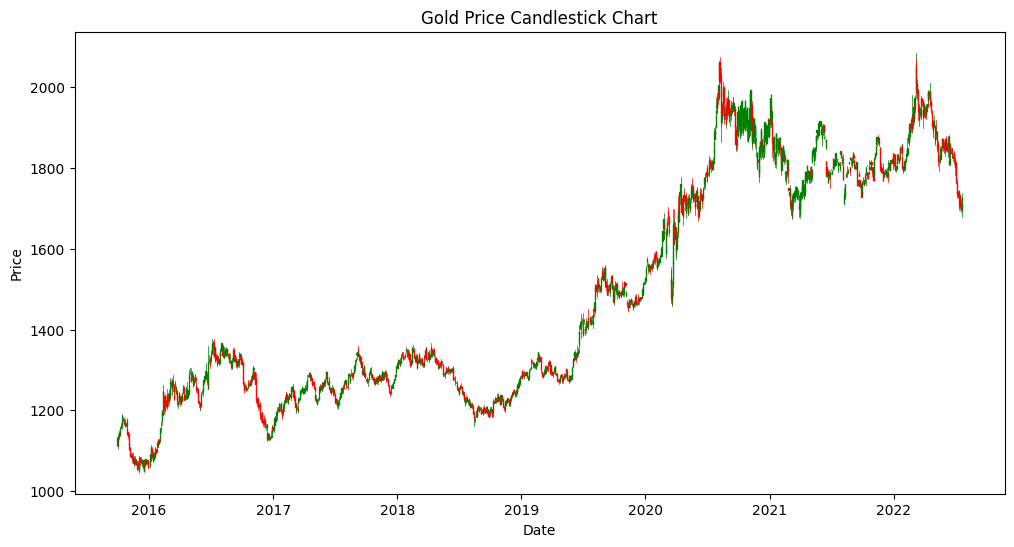

In [41]:

ohlc = df[['Open', 'High', 'Low', 'Price']].reset_index()
ohlc['Date'] = ohlc['Date'].map(mdates.date2num)

plt.figure(figsize=(12, 6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')
ax.xaxis_date()
ax.autoscale_view()
plt.title('Gold Price Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')

22:51:04 - cmdstanpy - INFO - Chain [1] start processing
22:51:04 - cmdstanpy - INFO - Chain [1] done processing


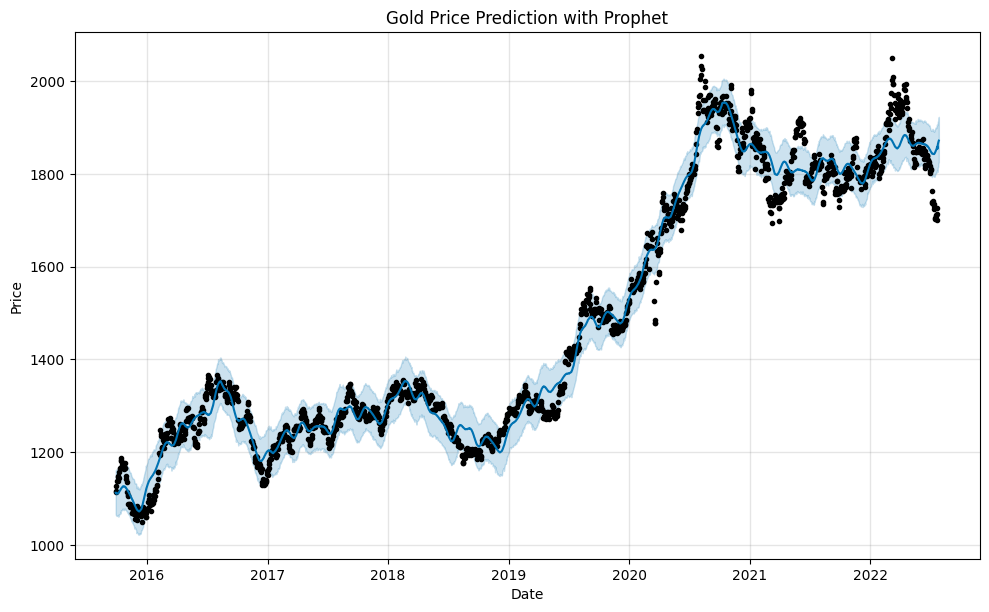

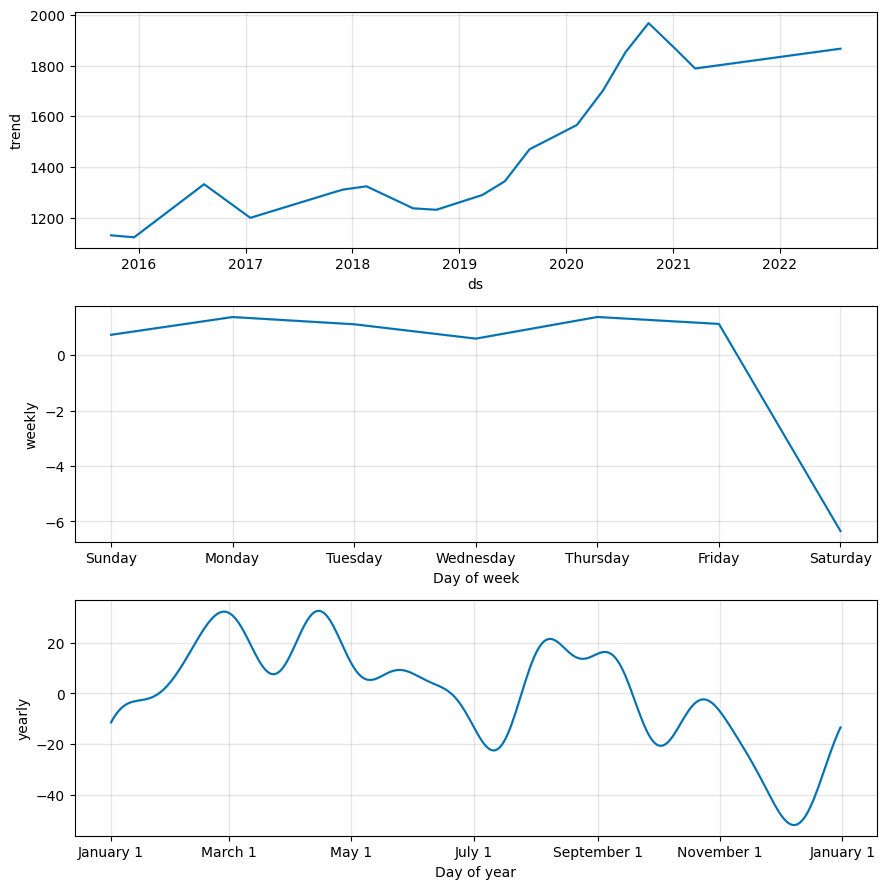

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

df['Date'] = pd.to_datetime(df.index, format='%d/%m/%Y')
prophet_data = df[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})

prophet_model = Prophet()
prophet_model.fit(prophet_data)

future = prophet_model.make_future_dataframe(periods=5)
prophet_forecast = prophet_model.predict(future)

fig = prophet_model.plot(prophet_forecast)
plt.title('Gold Price Prediction with Prophet')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

fig_components = prophet_model.plot_components(prophet_forecast)
plt.show()

del df["Date"]

22:53:33 - cmdstanpy - INFO - Chain [1] start processing
22:53:34 - cmdstanpy - INFO - Chain [1] done processing


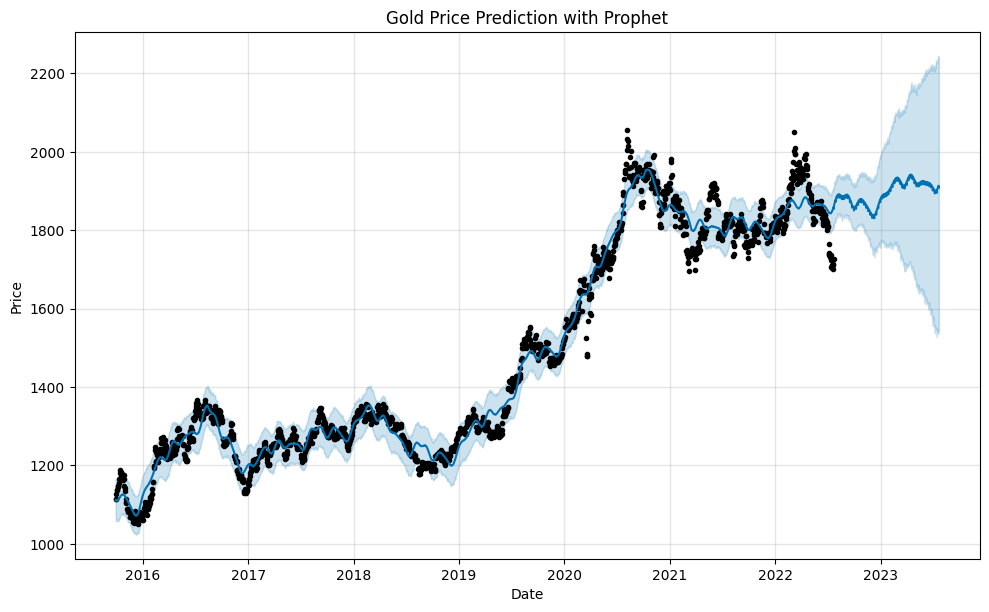

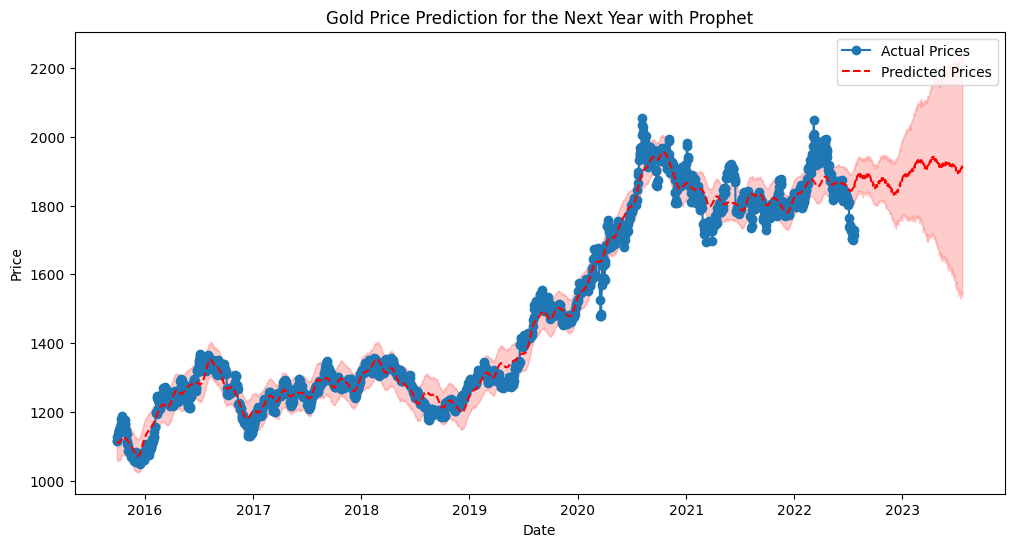

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

df['Date'] = pd.to_datetime(df.index, format='%d/%m/%Y')

prophet_data = df[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})

prophet_model = Prophet()
prophet_model.fit(prophet_data)

future = prophet_model.make_future_dataframe(periods=365)
prophet_forecast = prophet_model.predict(future)

fig = prophet_model.plot(prophet_forecast)
plt.title('Gold Price Prediction with Prophet')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Actual Prices', marker='o')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], label='Predicted Prices', linestyle='dashed', color='red')
plt.fill_between(prophet_forecast['ds'], prophet_forecast['yhat_lower'], prophet_forecast['yhat_upper'], color='red', alpha=0.2)
plt.title('Gold Price Prediction for the Next Year with Prophet')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

del df['Date']

In [70]:
def predict_single_date(target_date):
    single_date = pd.DataFrame({'ds': [pd.to_datetime(target_date)]})
    single_date_forecast = prophet_model.predict(single_date)
    predicted_value = single_date_forecast['yhat'].values[0]
    return f"The predicted value for {target_date} is: {predicted_value:.2f}"

target_date = '2022-12-31'

In [72]:
predict_single_date(target_date)

'The predicted value for 2022-12-31 is: 1871.07'